# Problem 1.5
## Vi Ly
[Perceptron](https://www.uh.edu/human-resources/PASS_Navigation/)

In [ ]:
using Plots

In [20]:
# Linear seperable data function 
function make_linearily_separable_data(n)
    coeff = rand(2)
    X = rand(n,2)
    above = []
    below = []
    
    for i = 1:n
        if coeff[1]*X[i,1] + coeff[2] < X[i,2]
            push!(above, (X[i,1], X[i,2]))
        end
        if coeff[1]*X[i,1] + coeff[2] > X[i,2]
            push!(below, (X[i,1], X[i,2]))
        end
    end
    
    return above, below, coeff
end 

make_linearily_separable_data (generic function with 1 method)

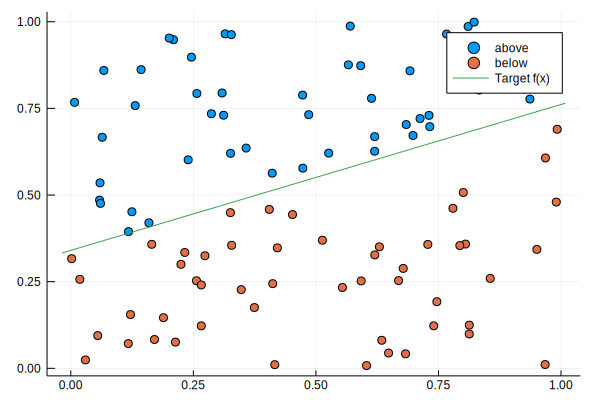

In [21]:
# Make random collection of linearily seperable data
above, below, coeff = make_linearily_separable_data(100)
scatter([x for x in above], label="above")
scatter!([x for x in below], label="below")
plot!(x->coeff[1]*x + coeff[2], label = "Target f(x)")

In [22]:
# Make data arrays 
Y_train = [1 for _ in above]
D_train = [x for x in above]
for x in below
    push!(D_train, x)
    push!(Y_train, -1)
end

In [24]:
# Assign random weights
w = rand(3)

# Perceptron Hypothesis Function 
function h(w, x)
    x_new = [1.0, x[1], x[2]]
    return w'x_new > 0 ? 1 : -1
end

# Perceptron Learning Algorithm 
function PLA_2!(w, x, y, n)
    n = n
    if h(w, x)*y < 1
        s = h(w,x)
        w += n*(y-s)*[1.0, x[1], x[2]]
    end
    return w
end

PLA_2! (generic function with 1 method)

In [25]:
# Our data set D consists of two vectors of information. 
# Assign X: input data
# Assign Y: known values 
X, Y = [[x[1], x[2]] for x in D_train], [x[1] == 1 ? 1 : -1 for x in Y_train]
# Iterate the PLA 
for i = 1:1000
    j = rand(1:100)
    w = PLA_2!(w, X[j], Y[j], 100)
end
w1 = w

3-element Array{Float64,1}:
 -399.82769215019493
 -507.9441880537569 
 1165.9512454890908 

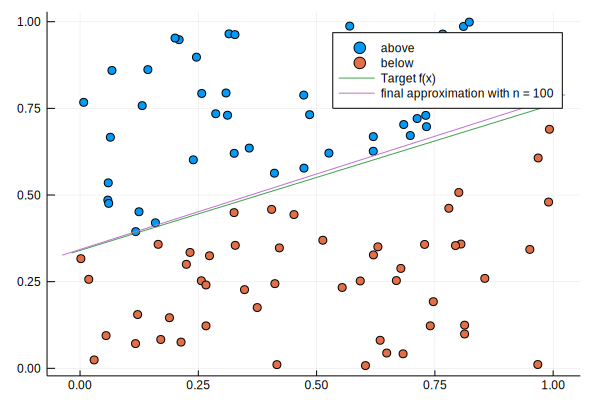

In [26]:
# Plot the final hypothesis
plot!(x -> -1*(w[2]/w[3])*x - (w[1]/w[3]), label="final approximation with n = 100")

**Error on the test set**

In [27]:
above2, below2, coeff2 = make_linearily_separable_data(10000)
# Make data arrays 
Y_test = [1 for _ in above2]
D_test = [x for x in above2]
for x in below2
    push!(D_test, x)
    push!(Y_test, -1)
end
# Our data set D consists of two vectors of information. 
# Assign X: input data
# Assign Y: known values 
X_test, Y_test = [[x[1], x[2]] for x in D_test], [x[1] == 1 ? 1 : -1 for x in Y_test]

(Array{Float64,1}[[0.306376, 0.568274], [0.458852, 0.610208], [0.192606, 0.388273], [0.0566142, 0.176831], [0.879802, 0.829466], [0.610528, 0.485494], [0.623615, 0.876294], [0.317545, 0.409331], [0.0293353, 0.162355], [0.978903, 0.790446]  …  [0.55194, 0.0675122], [0.826647, 0.247324], [0.40469, 0.175807], [0.609005, 0.250656], [0.845956, 0.498979], [0.677916, 0.105446], [0.656673, 0.133731], [0.714432, 0.0592584], [0.827479, 0.277726], [0.30319, 0.213765]], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [28]:
count = 0
w = rand(3)
for j = 1:10000
    if h(w1, X_test[j]) != Y_test[j]
        count +=1
    end
end
error = count/10000

0.1495

**b) n = 1**

In [29]:
# Iterate the PLA 
for i = 1:1000
    j = rand(1:100)
    w = PLA_2!(w, X[j], Y[j], 1)
end
w2 = w

3-element Array{Float64,1}:
 -3.7799052874359456
 -4.371546081559529 
 10.895206411031946 

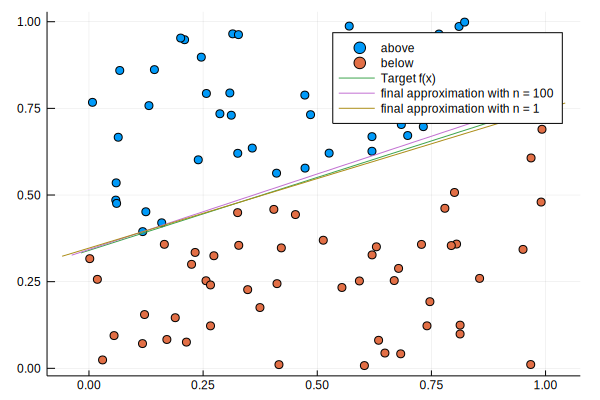

In [30]:
# Plot the final hypothesis
plot!(x -> -1*(w[2]/w[3])*x - (w[1]/w[3]), label="final approximation with n = 1")

In [31]:
count = 0
w = rand(3)
for j = 1:10000
    if h(w2, X_test[j]) != Y_test[j]
        count +=1
    end
end
error = count/10000

0.1377

**c) n = 0.01**

In [32]:
# Iterate the PLA 
for i = 1:1000
    j = rand(1:100)
    w = PLA_2!(w, X[j], Y[j], 0.01)
end
w3 = w

3-element Array{Float64,1}:
 -0.04966729809415027
 -0.06940408315909405
  0.15989083307317747

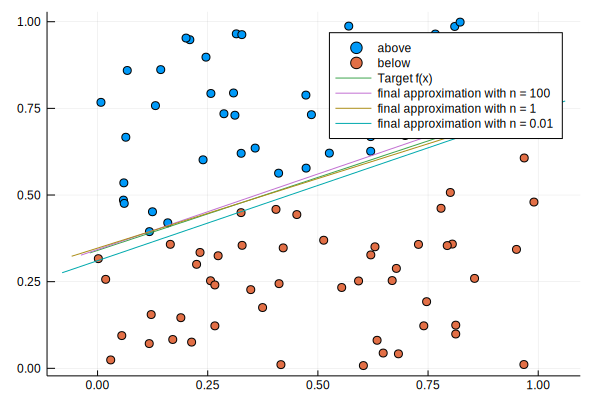

In [33]:
# Plot the final hypothesis
plot!(x -> -1*(w[2]/w[3])*x - (w[1]/w[3]), label="final approximation with n = 0.01")

In [34]:
count = 0
w = rand(3)
for j = 1:10000
    if h(w3, X_test[j]) != Y_test[j]
        count +=1
    end
end
error = count/10000

0.1187

**d) n = 0.0001**

In [35]:
# Iterate the PLA 
for i = 1:1000
    j = rand(1:100)
    w3 = PLA_2!(w, X[j], Y[j], 0.0001)
end
w4 = w

3-element Array{Float64,1}:
 0.9169598680650637 
 0.16933724825861618
 0.2585354418724659 

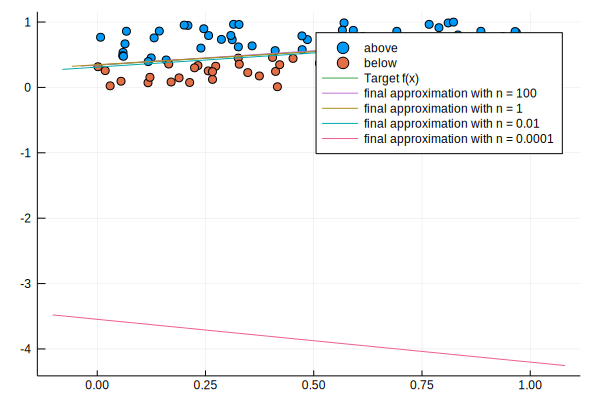

In [36]:
# Plot the final hypothesis
plot!(x -> -1*(w[2]/w[3])*x - (w[1]/w[3]), label="final approximation with n = 0.0001")

In [37]:
count = 0
w = rand(3)
for j = 1:10000
    if h(w4, X_test[j]) != Y_test[j]
        count +=1
    end
end
error = count/10000

0.4147

*From the graphs from a) - d), we can conclude that n = 0.01 has the smallest error value.*